In [19]:
import os
import sys
# Add the directory containing the VotingModel to the Python path
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))

from model.VotingRules import mean_aggregation,quadratic_aggregation,median_aggregation,quadratic_aggregation_round1
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re

from model.VoterBehaviours import random_uniform_model,rn_model, mallows_model,euclidean_model,multinomial_model,optimized_rn_model
from model.VotingModel import VotingModel

# Parameters
num_voters = 100
num_projects = 500
total_op_tokens=30000
K = 200
alpha = 2

In [14]:

# Run voting models
rn_votes = optimized_rn_model(num_projects,total_op_tokens, K)
mallows_votes = mallows_model(num_projects,total_op_tokens,)
euclidean_votes = euclidean_model(num_projects,total_op_tokens,)
ru_votes=random_uniform_model(num_projects,total_op_tokens)

rn_votes, mallows_votes, euclidean_votes,ru_votes

(array([60, 69, 59, 59, 60, 59, 58, 62, 53, 69, 67, 59, 68, 64, 55, 49, 57,
        57, 54, 41, 59, 65, 58, 61, 51, 63, 57, 63, 57, 56, 63, 49, 56, 59,
        64, 76, 53, 61, 66, 67, 72, 58, 53, 69, 63, 57, 61, 52, 67, 77, 66,
        63, 65, 63, 72, 53, 63, 49, 58, 62, 58, 85, 60, 55, 37, 60, 64, 65,
        63, 45, 69, 66, 57, 45, 64, 64, 51, 55, 69, 62, 58, 54, 60, 50, 60,
        57, 51, 60, 63, 57, 53, 66, 80, 60, 60, 59, 65, 62, 61, 74, 64, 52,
        48, 74, 66, 53, 42, 53, 66, 55, 47, 69, 53, 59, 67, 70, 57, 53, 59,
        56, 47, 65, 68, 70, 60, 71, 61, 68, 75, 77, 59, 71, 64, 57, 51, 67,
        76, 54, 73, 60, 58, 55, 62, 66, 64, 68, 59, 73, 50, 50, 66, 52, 51,
        65, 52, 52, 74, 81, 54, 54, 69, 55, 64, 71, 70, 52, 65, 77, 56, 60,
        62, 55, 65, 59, 74, 61, 59, 58, 66, 64, 52, 64, 57, 48, 58, 57, 52,
        59, 54, 53, 64, 48, 68, 48, 69, 58, 48, 66, 73, 59, 54, 47, 61, 46,
        57, 58, 55, 59, 68, 75, 58, 69, 61, 61, 56, 56, 61, 60, 61, 60, 76,
        59, 

In [15]:
voter_types = ['rn_model', 'mallows_model', 'euclidean_model', 'multinomial_model', 'random_uniform_model']
results = {}

for voter_type in voter_types:
    model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)
    results[voter_type] = model.step()
results

/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


{'rn_model': array([[59., 60., 73., ..., 64., 56., 71.],
        [60., 60., 75., ..., 64., 52., 62.],
        [64., 55., 66., ..., 63., 63., 64.],
        ...,
        [65., 71., 63., ..., 66., 61., 66.],
        [62., 67., 64., ..., 63., 63., 68.],
        [60., 59., 74., ..., 54., 53., 58.]]),
 'mallows_model': array([[58., 61., 48., ..., 62., 57., 64.],
        [35., 62., 50., ..., 64., 52., 54.],
        [66., 55., 61., ..., 74., 55., 68.],
        ...,
        [62., 57., 43., ..., 57., 62., 52.],
        [66., 55., 54., ..., 55., 67., 66.],
        [61., 51., 64., ..., 60., 69., 56.]]),
 'euclidean_model': array([[ 19.,  36.,  16., ...,  15.,  18.,  48.],
        [ 42.,  27.,  56., ...,  20., 284.,  56.],
        [132.,  40., 101., ...,  38.,  30.,  55.],
        ...,
        [ 37.,  37.,  80., ...,  46., 161.,  91.],
        [ 53.,  62.,  73., ..., 153.,  69.,  23.],
        [ 31.,  59.,  29., ...,  51.,  36.,  28.]]),
 'multinomial_model': array([[  1., 185., 160., ..., 221., 11

In [16]:
model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)
for voter_type in voter_types:
    model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)
    data=model.run_simulation()
    data.fillna(0, inplace=True)
    results[voter_type]=data
results

{'rn_model':          Project  Mean Aggregation  Median Aggregation  Quadratic Aggregation
 0      Project 1             58.02           58.193007              58.981971
 1      Project 2             58.43           58.193007              59.180321
 2      Project 3             60.55           60.701326              60.279579
 3      Project 4             59.60           59.196335              59.807809
 4      Project 5             60.20           60.199662              60.110957
 ..           ...               ...                 ...                    ...
 495  Project 496             59.00           58.193007              59.503551
 496  Project 497             60.08           59.697998              60.000054
 497  Project 498             59.94           59.196335              59.954773
 498  Project 499             61.15           60.199662              60.604552
 499  Project 500             59.90           61.202990              59.942520
 
 [500 rows x 4 columns],
 'mallows_mod

In [20]:
voter_types = ['rn_model', 'mallows_model', 'euclidean_model', 'multinomial_model', 'random_uniform_model']
voting_matrices = {}

for voter_type in voter_types:
    model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)
    model.step()
    voting_matrices[voter_type] = model.voting_matrix

/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


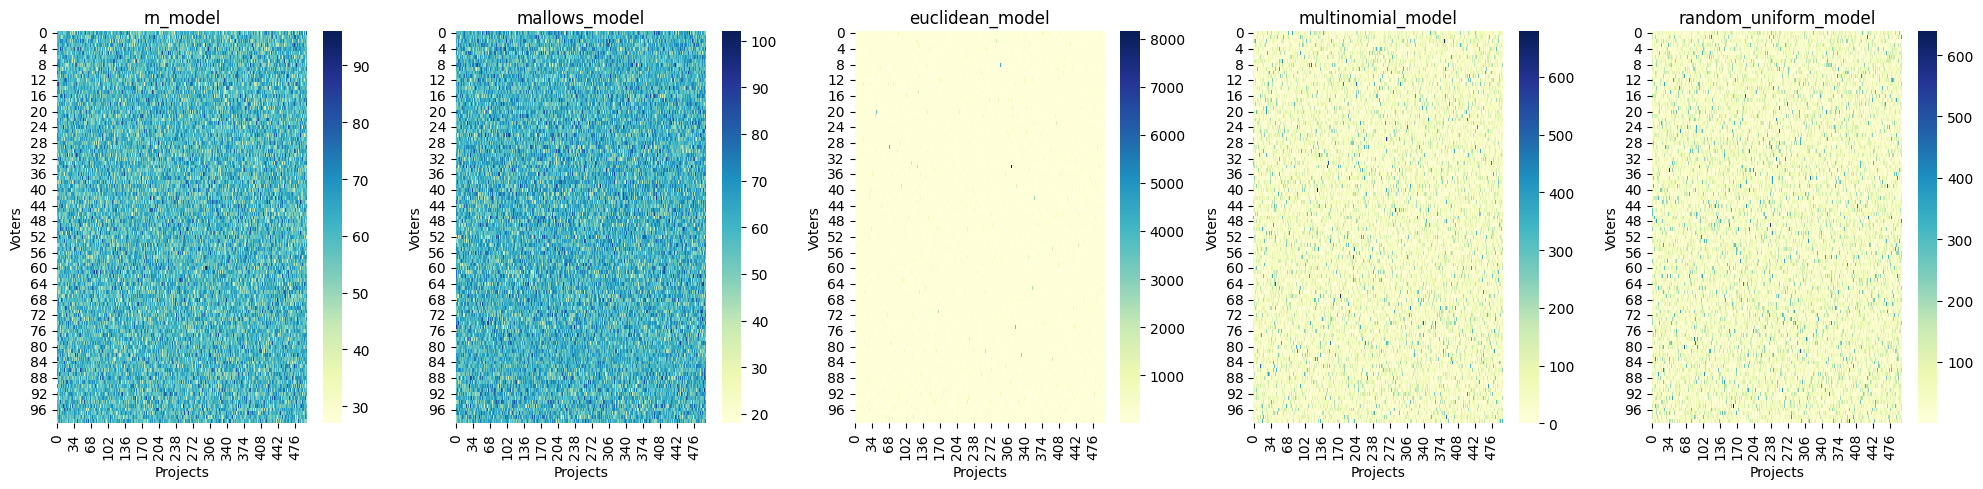

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_voting_matrices(voting_matrices):
    fig, axes = plt.subplots(1, len(voting_matrices), figsize=(20, 5))

    for ax, (voter_type, matrix) in zip(axes, voting_matrices.items()):
        sns.heatmap(matrix, ax=ax, cmap="YlGnBu", cbar=True)
        ax.set_title(voter_type)
        ax.set_xlabel("Projects")
        ax.set_ylabel("Voters")

    plt.tight_layout()
    plt.show()

plot_voting_matrices(voting_matrices)


In [25]:
from agents.VoterAgent import VoterAgent

In [ ]:
voter_type=
voter=VoterAgent(voter_type, num_projects, total_op_tokens)